In [11]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import os
import sys
import tensorflow as tf
from pygments.formatters import img
from tensorflow import keras
from PIL import Image;
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [13]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [14]:
train_images.shape
#len(train_labels)
#train_labels
#test_images.shape
len(test_labels)
print(test_labels)
#print(test_images[0])

[9 2 1 ... 8 1 5]


In [15]:
#This is a file converter
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt


def imageprepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    #print(tva)
    return tva
def convert(destination):
    x=[imageprepare(destination)]#file path here
    #print(len(x))# mnist IMAGES are 28x28=784 pixels
    #print(x[0])
#Now we convert 784 sized 1d array to 24x24 sized 2d array so that we can visualize it
    newArr=[[0 for d in range(28)] for y in range(28)]
    k = 0
    for i in range(28):
        for j in range(28):
            newArr[i][j]=x[0][k]
            k=k+1

    #for i in range(28):
        #for j in range(28):
            #print(newArr[i][j])
        # print(' , ')
        #print('\n')


    plt.imshow(newArr, interpolation='nearest')
    plt.savefig('/Users/danielnguyen/PycharmProjects/BoilerMake/venv/lib/TestData1/TestResults/data1.png')#save MNIST image
    plt.show()#Show / plot that image
    return newArr



In [16]:
#data1 = Image.open('/Users/danielnguyen/PycharmProjects/BoilerMake/TestData1/shop.png')
#data1.show()
#data1.shape

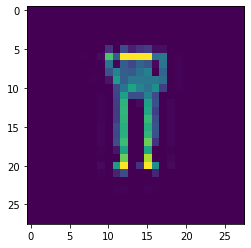

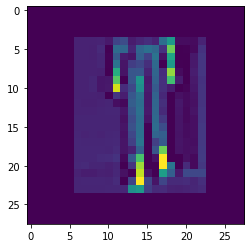

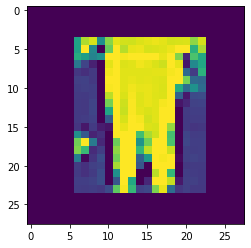

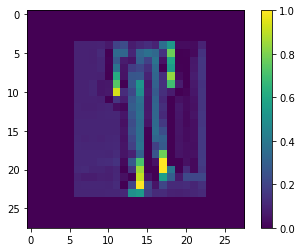

In [17]:
testData = convert('/Users/danielnguyen/PycharmProjects/BoilerMake/venv/lib/TestData1/data7.png')
trainData1 = convert('/Users/danielnguyen/PycharmProjects/BoilerMake/venv/lib/TestData1/data5.png')
trainData2 = convert('/Users/danielnguyen/PycharmProjects/BoilerMake/venv/lib/TestData1/IMG_1683.png')

plt.figure()
plt.imshow(testData)#sho
plt.imshow(trainData1)# w picture of test data
#plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
New_train_labels = np.copy(train_labels)

In [19]:
#trainData

In [20]:
train_images = train_images / 255.0

test_images = test_images / 255.0
#testData = testData / 255.0
#train_images = np.append(train_images,trainData)
train_images[0] = trainData1
train_images[1] = trainData2
New_train_labels.flags.writeable = True
New_train_labels[0] = 1
New_train_labels[1] = 1

#New_train_labels = np.append(train_labels,6)
#train_images.shape
test_images[0] = testData


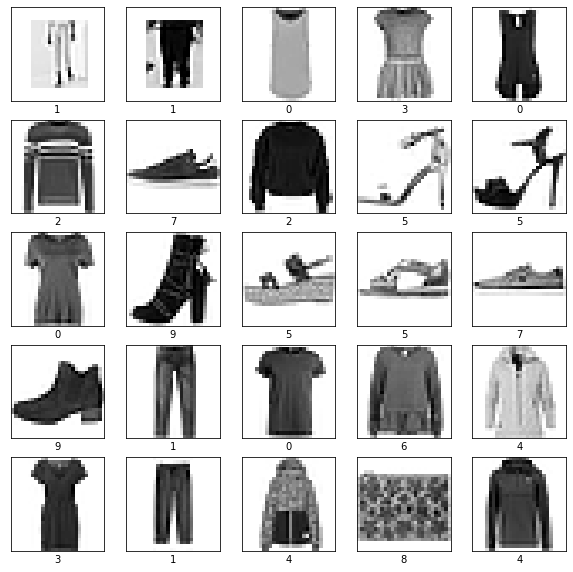

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(New_train_labels[i])
    
plt.show()



In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [23]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [25]:
model.fit(train_images, New_train_labels, epochs=20)
#works at 17

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.5039 - accuracy: 0.8230
Epoch 2/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3759 - accuracy: 0.8636
Epoch 3/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3374 - accuracy: 0.8774
Epoch 4/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3118 - accuracy: 0.8859
Epoch 5/20
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2955 - accuracy: 0.8916
Epoch 6/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2827 - accuracy: 0.8954
Epoch 7/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2701 - accuracy: 0.8999
Epoch 8/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2581 - accuracy: 0.9046
Epoch 9/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2473 - accuracy: 0.9078
Epoch 10/20
60

In [26]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3794 - accuracy: 0.8731

Test accuracy: 0.8731


In [27]:
predictions = model.predict(test_images)
#predictions = model.predict(data1)


In [28]:
predictions[0]


array([1.03173316e-01, 8.50840092e-01, 2.36452659e-04, 3.50111127e-02,
       3.43794399e-03, 1.51215150e-04, 5.97262988e-03, 6.83169219e-07,
       1.17524865e-03, 1.18314472e-06], dtype=float32)

In [29]:
count = 0
while class_names[np.argmax(predictions[count])] == 'Bag':
    count = count + 1
print(class_names[np.argmax(predictions[count])])
sys.stdout.flush()



Trouser
